# Librerías

In [1]:
import numpy as np
import os.path as path
import matplotlib.pyplot as plt

# Def Variables

In [2]:
file = 'Sigmoid.csv'
Path_ = file

data = np.loadtxt(Path_,dtype=float,delimiter=",",skiprows=1)

x = data[:,0]
y = data[:,1]
N = len(x)

# a) Modelo de ajuste

In [3]:
def M(x,p):
    return p[0]/(p[1]+np.exp(-p[2]*x))

# b) Función de costo

In [4]:
def X2(p,x,y):
    term= y-M(x,p)
    return np.sum(term**2)

# c) Demostración de las derivadas parciales

Sea, $$x^2(\overrightarrow{\theta})=\sum_{i=1}^n{\biggl(\frac{y_i-M(x_i,\overrightarrow{\theta})}{\sigma_i}\biggr)}^2.$$
Decimos que $\forall_i\,\sigma_i=1$. Luego, $$\frac{\partial x^2(\overrightarrow{\theta})}{\partial \theta_i}=\sum_{i=1}^n2\biggl(y_i-M(x_i,\overrightarrow{\theta})\biggr)\frac{-\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_i}=-2\sum_{i=1}^n\biggl(y_i-M(x_i,\overrightarrow{\theta})\biggr)\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_i}.$$

# d) Demostración del descenso del gradiente

Se tiene que $\overrightarrow{\theta}_{j+1}=\overrightarrow{\theta}_j-\gamma\triangledown x^2(\overrightarrow{\theta}_j)$. Luego, $\overrightarrow{\theta}_{j+1}=\overrightarrow{\theta}_j-\gamma\biggl(y_i-M(x_i,\overrightarrow{\theta}))\biggl[\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_0},\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_1},\frac{\partial M(x_i,\overrightarrow{\theta})}{\partial \theta_2}\biggr]\biggr)$.

$\therefore\,\overrightarrow{\theta}_{j+1}=\overrightarrow{\theta}_j-\gamma\biggl(-2\sum_{i=1}^n\biggl(y_i-M(x_i,\overrightarrow{\theta})\biggr)\triangledown M(x_i,\overrightarrow{\theta}_j)\biggr).$

# e) Taza de aprendizaje

In [5]:
Theta = np.array([1,1,1])

def GetGrad(M,p,x,h=1e-6):
    dim=len(p)
    J = np.zeros(dim)
    
    for j in range(dim):
        h_=np.zeros(dim)
        h_[j]=h
        J[j] = (  M(x,p+h_) - M(x,p-h_) )/(2*h)
                
    return J

In [6]:
def DescGrad(M,p,x,y,lr=1e-3,epochs=int(1e4),error=1e-2):
    d = 1
    it = 0
    
    print("Estamos entrenando el código, no se vaya")
    
    while d > error and it < epochs:
        Sum=0
        
        #Machine Learning
        for i in range(len(y)):
            Sum += (y[i]-M(x[i],p))*GetGrad(M,p,x[i])

        p = p - lr*(-2)*Sum
        New = X2(p,x,y)
        d = np.sqrt(New/len(y))
          
        it += 1

    if it == epochs:
        print('Máximo de iteraciones alcanzado ',d)
        
    return p,it


par,num_it=DescGrad(M,Theta,x,y)
print("parámetros: ",par)

Estamos entrenando el código, no se vaya
Máximo de iteraciones alcanzado  0.04589848774110997
parámetros:  [4.35688088 0.96529898 2.79303697]


# f) Gráfica

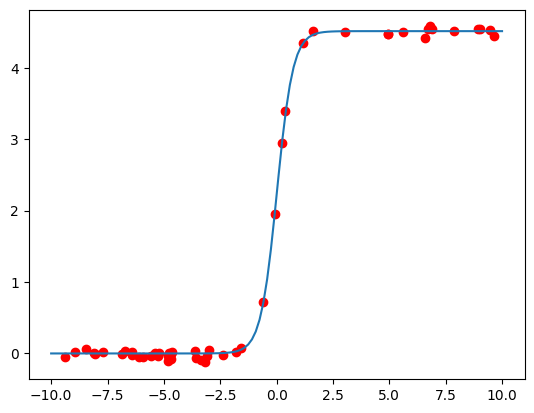

In [7]:
X=np.linspace(-10,10,120)
plt.scatter(x,y,color="r")
plt.plot(X,M(X,par))
plt.show()